# Airline Delay Prediction and Analysis

## Overview

This work presents a comprehensive machine learning analysis of airline delays using the U.S. Department of Transportation's Airline On-Time Statistics and Delay Causes dataset. The project develops a complete data science pipeline to predict high-delay periods and extract actionable insights for airline operations.

## Dataset Description

The analysis utilizes over 400,000+ flight records spanning from 2003 to 2025, covering domestic flights operated by major U.S. carriers. The dataset includes detailed information on:
- Flight operations (arrivals, cancellations, diversions)
- Delay causes (Air Carrier, Weather, National Aviation System, Late Aircraft, Security)
- Temporal patterns (monthly and yearly trends)
- Carrier and airport-specific performance metrics

## Objectives

1. **Predictive Modeling**: Develop machine learning models to classify months with high delay rates (>25%) vs. normal operations
2. **Operational Insights**: Identify key factors contributing to flight delays through exploratory data analysis
3. **Performance Comparison**: Evaluate multiple algorithms to determine the most effective approach for delay prediction
4. **Feature Engineering**: Create meaningful predictors from raw operational data to improve model performance

## Student ID: 00016395

# Loading the dataset, identify shape and overview

In [1]:
import pandas as pd
import joblib
import os

df = pd.read_csv('data/Airline_Delay_Cause.csv')
print("Dataset loaded sucessfully!!!")

print(f"Dataset shape: {df.shape}")

Dataset loaded sucessfully!!!
Dataset shape: (409612, 21)


# Exploratory Data Analysis (EDA)

In [2]:
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
print("-" * 40)
print("Dataset First 10 rows: ")
df.head(10)


Dataset shape: 409612 rows x 21 columns
----------------------------------------
Dataset First 10 rows: 


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",18.0,2.0,1.43,0.00,...,0.0,0.00,0.0,0.0,44.0,32.0,0.0,12.0,0.0,0.0
1,2025,7,YV,Mesa Airlines Inc.,CHS,"Charleston, SC: Charleston AFB/International",48.0,16.0,4.06,3.15,...,0.0,3.30,2.0,0.0,1282.0,331.0,438.0,259.0,0.0,254.0
2,2025,7,YV,Mesa Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",65.0,10.0,3.53,1.00,...,0.0,2.43,2.0,0.0,735.0,151.0,172.0,139.0,0.0,273.0
3,2025,7,YV,Mesa Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",134.0,31.0,13.19,2.43,...,0.0,4.74,8.0,0.0,2264.0,798.0,303.0,702.0,0.0,461.0
4,2025,7,YV,Mesa Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",61.0,12.0,6.44,0.28,...,0.0,1.69,0.0,0.0,630.0,211.0,17.0,123.0,0.0,279.0
5,2025,7,YV,Mesa Airlines Inc.,COS,"Colorado Springs, CO: City of Colorado Springs...",31.0,5.0,1.84,0.00,...,0.0,2.01,0.0,0.0,668.0,154.0,0.0,67.0,0.0,447.0
6,2025,7,YV,Mesa Airlines Inc.,CRP,"Corpus Christi, TX: Corpus Christi International",19.0,4.0,0.71,0.30,...,0.0,2.29,1.0,0.0,823.0,45.0,6.0,14.0,0.0,758.0
7,2025,7,YV,Mesa Airlines Inc.,CVG,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",75.0,14.0,7.64,1.00,...,0.0,1.79,0.0,0.0,722.0,485.0,24.0,81.0,0.0,132.0
8,2025,7,YV,Mesa Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",97.0,23.0,8.09,0.73,...,0.0,9.33,1.0,0.0,2125.0,655.0,65.0,437.0,0.0,968.0
9,2025,7,YV,Mesa Airlines Inc.,DRO,"Durango, CO: Durango La Plata County",31.0,1.0,0.82,0.00,...,0.0,0.00,0.0,0.0,50.0,41.0,0.0,9.0,0.0,0.0


In [3]:
print('Checking datatypes: ')
df.info()
print("-" * 40)

Checking datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409612 entries, 0 to 409611
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 409612 non-null  int64  
 1   month                409612 non-null  int64  
 2   carrier              409612 non-null  object 
 3   carrier_name         409612 non-null  object 
 4   airport              409612 non-null  object 
 5   airport_name         409612 non-null  object 
 6   arr_flights          408952 non-null  float64
 7   arr_del15            408656 non-null  float64
 8   carrier_ct           408952 non-null  float64
 9   weather_ct           408952 non-null  float64
 10  nas_ct               408952 non-null  float64
 11  security_ct          408952 non-null  float64
 12  late_aircraft_ct     408952 non-null  float64
 13  arr_cancelled        408952 non-null  float64
 14  arr_diverted         408952 non-null  float64
 

In [4]:
print('Summary for numerical columns:')
df.describe()

Summary for numerical columns:


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,409612.000000,409612.000000,408952.000000,408656.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000
mean,2014.715218,6.468014,361.155219,69.864434,20.621496,2.536097,22.230743,0.171458,24.254104,6.744285,0.840910,4218.975002,1324.919900,228.574708,1034.045357,7.148976,1624.278981
std,6.616430,3.442544,993.827182,194.585817,48.715269,9.662785,79.393254,0.821340,74.913717,34.782892,3.834991,12976.256753,3905.756663,909.755462,4362.757658,39.156889,5246.925768
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2009.000000,3.000000,55.000000,8.000000,2.790000,0.000000,1.410000,0.000000,1.540000,0.000000,0.000000,408.000000,134.000000,0.000000,49.000000,0.000000,77.000000
50%,2015.000000,6.000000,112.000000,21.000000,7.500000,0.530000,4.910000,0.000000,5.550000,1.000000,0.000000,1150.000000,411.000000,23.000000,184.000000,0.000000,347.000000
75%,2021.000000,9.000000,254.000000,52.000000,18.660000,2.000000,13.980000,0.000000,16.270000,4.000000,1.000000,2999.000000,1082.000000,158.000000,558.000000,0.000000,1104.000000
max,2025.000000,12.000000,21977.000000,6377.000000,1886.580000,717.940000,4091.270000,80.560000,2588.130000,4951.000000,256.000000,648300.000000,321792.000000,64550.000000,238440.000000,3760.000000,279153.000000


In [5]:
print('Summary for categorical columns:')
df.describe(include=['object'])

Summary for categorical columns:


,carrier,carrier_name,airport,airport_name
count,409612,409612,409612,409612
unique,38,51,426,460
top,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,47650,47650,3785,3785


In [6]:
print('Checking missing values:')
df.isnull().sum()


Checking missing values:


year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            660
arr_del15              956
carrier_ct             660
weather_ct             660
nas_ct                 660
security_ct            660
late_aircraft_ct       660
arr_cancelled          660
arr_diverted           660
arr_delay              660
carrier_delay          660
weather_delay          660
nas_delay              660
security_delay         660
late_aircraft_delay    660
dtype: int64

In [7]:
print('Checking for duplicates:')
df.duplicated().sum()

Checking for duplicates:


np.int64(0)

### Distribution of arrival delay

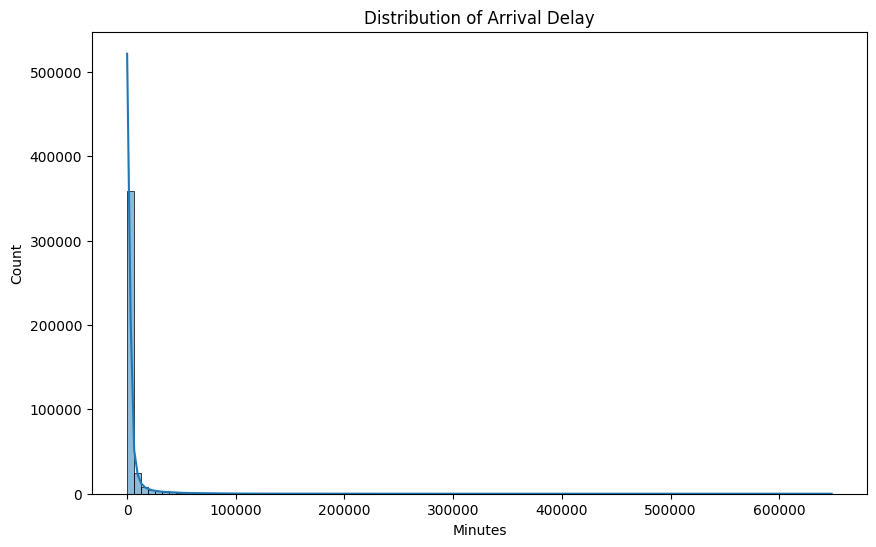

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], bins=100, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

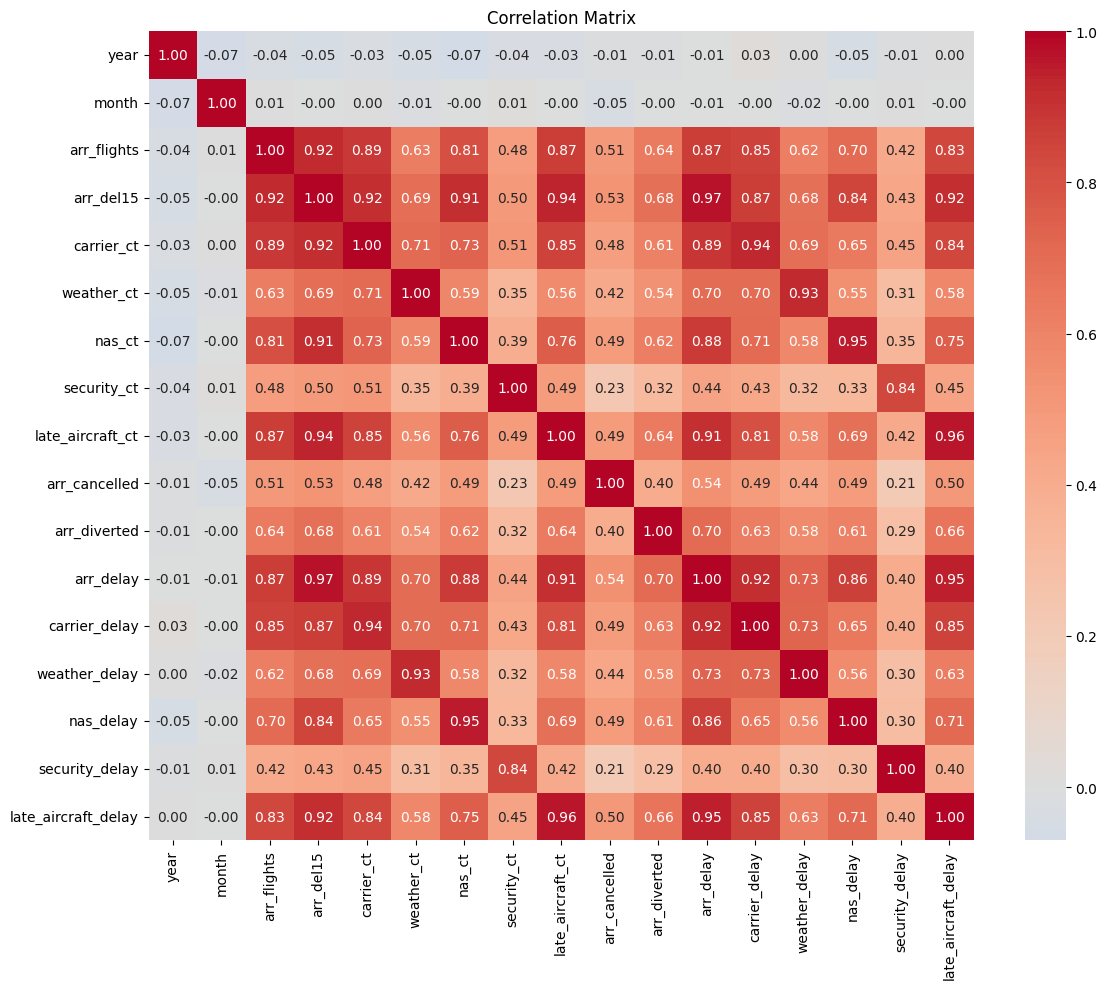

In [9]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#### Avarage delay by type(cause of delay)

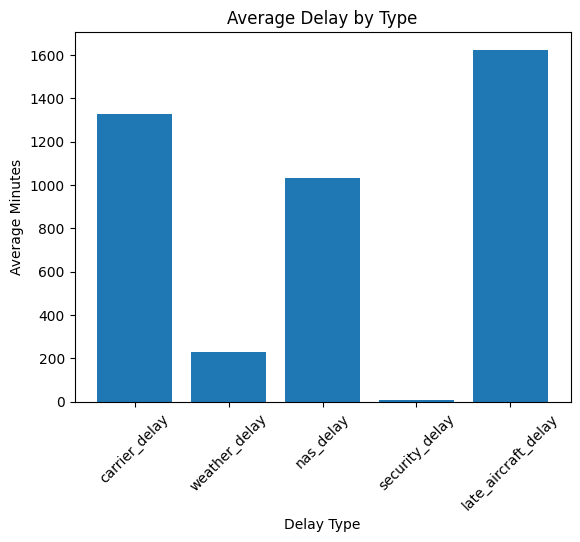

In [10]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_means = df[delay_types].mean()
plt.bar(delay_means.index, delay_means.values)
plt.title('Average Delay by Type')
plt.xlabel('Delay Type')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.show()



#### Delays by carier

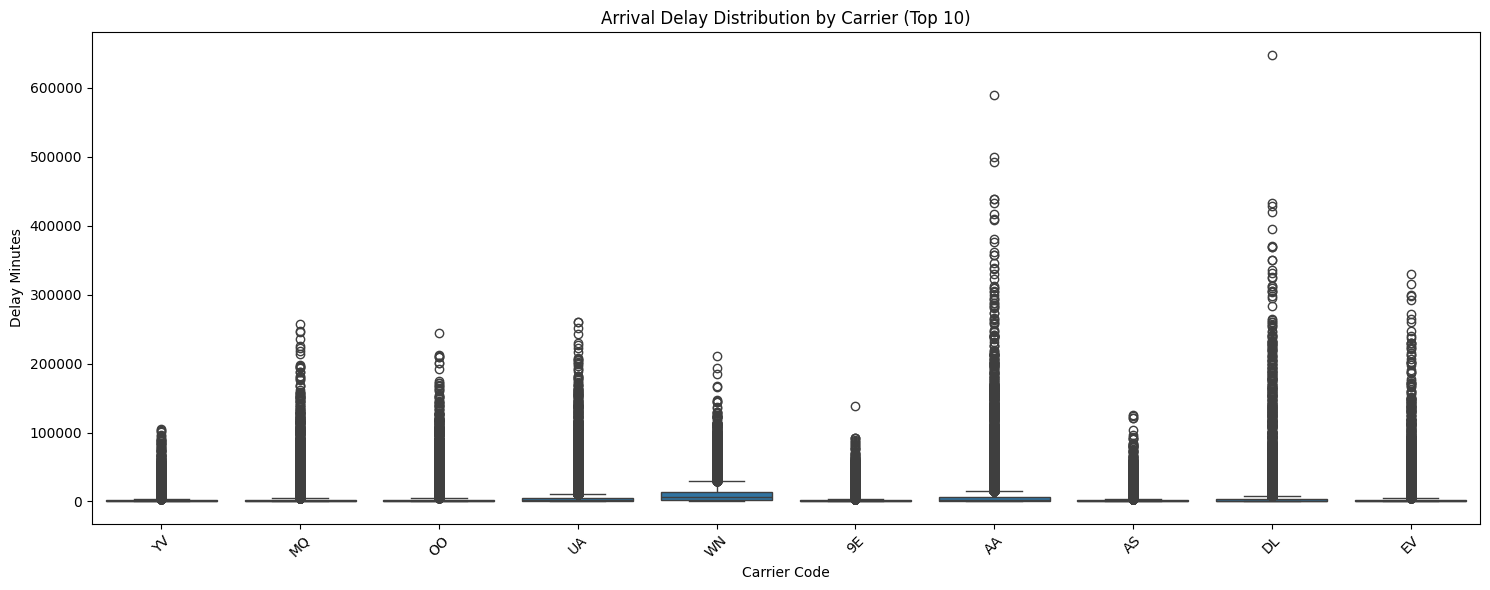

In [11]:
plt.figure(figsize=(15, 6))
top_carriers = df['carrier'].value_counts().nlargest(10).index
df_top = df[df['carrier'].isin(top_carriers)]
sns.boxplot(x='carrier', y='arr_delay', data=df_top)
plt.title('Arrival Delay Distribution by Carrier (Top 10)')
plt.xlabel('Carrier Code')
plt.ylabel('Delay Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Avarage Delay by Month

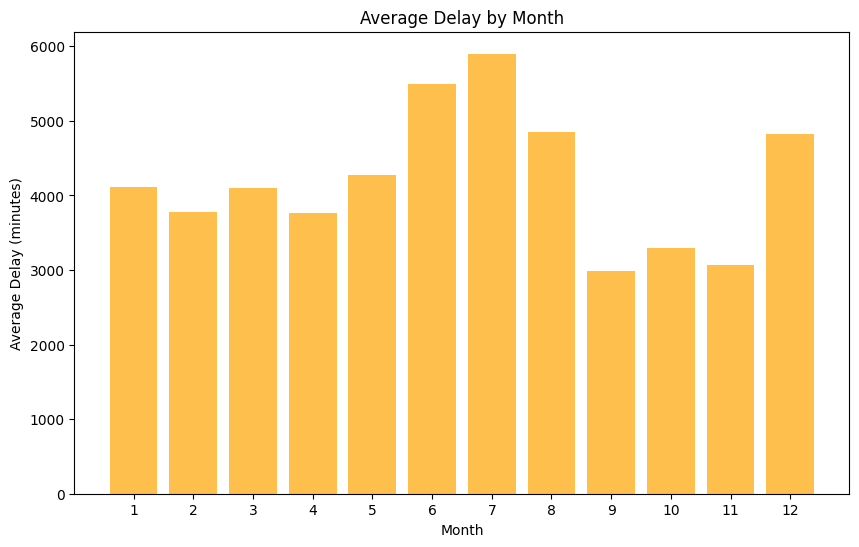

In [12]:
monthly_delay = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_delay.index, monthly_delay.values, color='orange', alpha=0.7)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))
plt.show()

#### Cancellation and diversion graphs

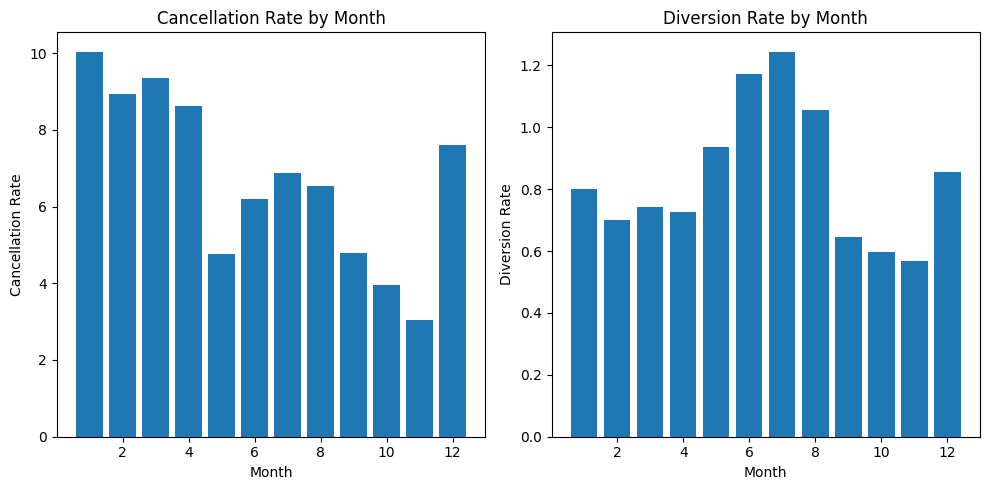

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
cancellation_rate = df.groupby('month')['arr_cancelled'].mean()
plt.bar(cancellation_rate.index, cancellation_rate.values)
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')

plt.subplot(1, 2, 2)
diversion_rate = df.groupby('month')['arr_diverted'].mean()
plt.bar(diversion_rate.index, diversion_rate.values)
plt.title('Diversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Diversion Rate')

plt.tight_layout()
plt.show()

# Data Preperation 


### Copy of dataset for preprocessing

In [14]:
df_clean = df.copy()

### Handling Missing Values

In [15]:
print(f"Missing values before handling:")
print(df_clean.isnull().sum().sort_values(ascending=False))

Missing values before handling:
arr_del15              956
nas_ct                 660
security_ct            660
security_delay         660
nas_delay              660
weather_delay          660
carrier_delay          660
arr_delay              660
arr_diverted           660
arr_cancelled          660
late_aircraft_ct       660
late_aircraft_delay    660
weather_ct             660
carrier_ct             660
arr_flights            660
month                    0
airport_name             0
airport                  0
carrier_name             0
carrier                  0
year                     0
dtype: int64


For better performance of the upcoming models i have chosen filling missing values rather than dropping them, and followed strategy below:
- for delay minutes columns filling with 0(no delays)
- for categorical columns filled with 'Unknown'

In [16]:
delay_minutes_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 
                      'security_delay', 'late_aircraft_delay', 'arr_delay', 'arr_cancelled', 'arr_diverted']
for col in delay_minutes_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)
        
print('Data filled with 0 for delay minutes columns')        

Data filled with 0 for delay minutes columns


In [17]:
count_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 
              'late_aircraft_ct', 'arr_del15', 'arr_flights']
for col in count_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)
        
print('Data filled with 0 for count columns')        

Data filled with 0 for count columns


In [18]:
categorical_cols = ['carrier', 'carrier_name', 'airport', 'airport_name']
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna('Unknown')
        
print('Data filled with Unknown for categorical columns')        

Data filled with Unknown for categorical columns


In [19]:
print(f"\nMissing values after handling:")
print(df_clean.isnull().sum().sort_values(ascending=False))


Missing values after handling:
year                   0
security_ct            0
security_delay         0
nas_delay              0
weather_delay          0
carrier_delay          0
arr_delay              0
arr_diverted           0
arr_cancelled          0
late_aircraft_ct       0
nas_ct                 0
month                  0
weather_ct             0
carrier_ct             0
arr_del15              0
arr_flights            0
airport_name           0
airport                0
carrier_name           0
carrier                0
late_aircraft_delay    0
dtype: int64


### Checking for data with errors (eg. negative flights, delays more than flights )

In [20]:
if 'arr_flights' in df_clean.columns:
    negative_flights = (df_clean['arr_flights'] < 0).sum()
    if negative_flights > 0:
        print(f"Found {negative_flights} rows with negative flight count. Setting to 0.")
        df_clean['arr_flights'] = df_clean['arr_flights'].clip(lower=0)

In [21]:
if all(col in df_clean.columns for col in ['arr_del15', 'arr_flights']):
    impossible = (df_clean['arr_del15'] > df_clean['arr_flights']).sum()
    if impossible > 0:
        print(f"Found {impossible} rows where delayed flights > total flights. Correcting...")
        df_clean['arr_del15'] = df_clean[['arr_del15', 'arr_flights']].min(axis=1)

### Outliers

In [22]:
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    
    if outliers > 0:
        data[column] = np.clip(data[column], lower_bound, upper_bound)
    
    return outliers

outlier_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']

for col in outlier_cols:
    if col in df_clean.columns:
        outliers_count = handle_outliers(df_clean, col)
        if outliers_count > 0:
            print(f"  - {col}: {outliers_count} outliers capped")

print("Outliers handled using IQR method!!!")

  - arr_delay: 46990 outliers capped
  - carrier_delay: 43030 outliers capped
  - weather_delay: 51053 outliers capped
  - nas_delay: 50811 outliers capped
  - late_aircraft_delay: 48270 outliers capped
Outliers handled using IQR method!!!


# Feature Engineering

Creating delay probability target with 25% threshold: Here threshold means if 25% of the flights of one airline is delayed, it means there is high delay rate


In [23]:
# Creating delay probability target
df_clean['delay_rate'] = df_clean['arr_del15'] / df_clean['arr_flights'].replace(0, 1)
print("Delay rate statistics:")
print(df_clean['delay_rate'].describe())

df_clean['high_delay_month'] = (df_clean['delay_rate'] > 0.25).astype(int)
print("Class distribution:")
print(df_clean['high_delay_month'].value_counts(normalize=True) * 100)

Delay rate statistics:
count    409612.000000
mean          0.198698
std           0.115119
min           0.000000
25%           0.122642
50%           0.185930
75%           0.258621
max           1.000000
Name: delay_rate, dtype: float64
Class distribution:
high_delay_month
0    72.928772
1    27.071228
Name: proportion, dtype: float64


Time Based features:

In [24]:
df_clean['quarter'] = ((df_clean['month'] - 1) // 3) + 1
df_clean['is_winter'] = df_clean['month'].isin([12, 1, 2]).astype(int)
df_clean['is_summer'] = df_clean['month'].isin([6, 7, 8]).astype(int)
df_clean['is_peak_travel'] = df_clean['month'].isin([6, 7, 8, 11, 12]).astype(int)


Additionally to have more comprehensive feature engeneering following features is created:

In [25]:
# Creating approxiamate daily flights
df_clean['flights_per_day'] = df_clean['arr_flights'] / 30 
# Creating cancellation rate
df_clean['cancellation_rate'] = df_clean['arr_cancelled'] / df_clean['arr_flights'].replace(0, 1)
# Creating total disruptions
df_clean['total_disruptions'] = df_clean['arr_cancelled'] + df_clean['arr_diverted']

Airport and carrier effeciency rates

In [26]:
airport_stats = df_clean.groupby('airport').agg({
    # 'delay_rate': 'mean', Removed as it was causing data leakage, beacuse it is direct delay indicator
    'arr_flights': ['sum', 'mean'],
    'arr_cancelled': 'sum',
    'arr_diverted': 'sum'
}).round(2)

airport_stats.columns = ['airport_total_flights', 'airport_avg_flights', 'airport_total_cancelled', 'airport_total_diverted']

carrier_stats = df_clean.groupby('carrier').agg({
    # 'delay_rate': 'mean', Removed as it was causing data leakage, beacuse it is direct delay indicator
    'arr_flights': ['sum', 'mean'],
    'arr_cancelled': 'sum', 
    'arr_diverted': 'sum'
}).round(2)

carrier_stats.columns = ['carrier_total_flights', 'carrier_avg_flights', 'carrier_total_cancelled', 'carrier_total_diverted']

# Merging features
df_clean = df_clean.merge(airport_stats, left_on='airport', right_index=True, how='left')
df_clean = df_clean.merge(carrier_stats, left_on='carrier', right_index=True, how='left')

print("Feature engineering completed without data leakage!")
print(f"Dataset shape: {df_clean.shape}")

# airport and carrier statistics for streamlit
stats_data = {
    'airport_stats': airport_stats,
    'carrier_stats': carrier_stats
}
joblib.dump(stats_data, 'models/stats_data.pkl')
print("Airport and carrier statistics saved to models/stats_data.pkl")

Feature engineering completed without data leakage!
Dataset shape: (409612, 38)
Airport and carrier statistics saved to models/stats_data.pkl


Cleaning the unnecesary features:

In [27]:
leakage_cols = [
    'arr_del15', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'delay_rate', 'carrier_name', 'airport_name'
]

clean_features = [col for col in df_clean.columns if col not in leakage_cols + ['high_delay_month']]
df_model = df_clean[clean_features + ['high_delay_month']].copy()

print(f"Removed {len(leakage_cols)} leakage columns")
print(f"Clean dataset shape: {df_model.shape}")
print("Remaining features:", clean_features)

feature_info = {
    'feature_columns': clean_features,
    'categorical_columns': ['carrier', 'airport']
}
joblib.dump(feature_info, 'models/feature_info.pkl')
print("Feature information saved to models/feature_info.pkl")
print(f"Features to be used: {len(clean_features)}")

Removed 15 leakage columns
Clean dataset shape: (409612, 23)
Remaining features: ['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled', 'arr_diverted', 'quarter', 'is_winter', 'is_summer', 'is_peak_travel', 'flights_per_day', 'cancellation_rate', 'total_disruptions', 'airport_total_flights', 'airport_avg_flights', 'airport_total_cancelled', 'airport_total_diverted', 'carrier_total_flights', 'carrier_avg_flights', 'carrier_total_cancelled', 'carrier_total_diverted']
Feature information saved to models/feature_info.pkl
Features to be used: 22


### Feature and Target Prepation

In [28]:
# Preparing features and target
X = df_model.drop('high_delay_month', axis=1)
y = df_model['high_delay_month']

print(f"Features shape: {X.shape}")
print(f"Target distribution:")
print(y.value_counts(normalize=True) * 100)

# Checking class imbalance ratio
imbalance_ratio = y.value_counts()
minority_ratio = imbalance_ratio[1] / imbalance_ratio[0]
print(f"Class imbalance ratio: {imbalance_ratio[0]}:{imbalance_ratio[1]} (No delay:Delay)")
print(f"Minority class is {minority_ratio:.2%} of majority class")

Features shape: (409612, 22)
Target distribution:
high_delay_month
0    72.928772
1    27.071228
Name: proportion, dtype: float64
Class imbalance ratio: 298725:110887 (No delay:Delay)
Minority class is 37.12% of majority class


### Class Weight Method for Imbalance handling

In [29]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print(f"Calculated class weights: {class_weight_dict}")
print(f"Minority class weight: {class_weight_dict[1]:.3f}")
print(f"Majority class weight: {class_weight_dict[0]:.3f}")
print(f"Weight ratio: {class_weight_dict[1]/class_weight_dict[0]:.2f}x")

Calculated class weights: {np.int64(0): np.float64(0.6856004686584651), np.int64(1): np.float64(1.8469793573638027)}
Minority class weight: 1.847
Majority class weight: 0.686
Weight ratio: 2.69x


### Encode Categorical Variables

In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

print("Categorical encoding completed!")

# Save label encoders for streamlit
os.makedirs('models', exist_ok=True)
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print("Label encoders saved to models/label_encoders.pkl")

Encoded carrier: 38 unique values
Encoded airport: 426 unique values
Categorical encoding completed!
Label encoders saved to models/label_encoders.pkl


### Scaling the features

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns
X_scaled = X_encoded.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print("Feature scaling completed!")

joblib.dump(scaler, 'models/scaler.pkl')
print("Scaler saved to models/scaler.pkl")

Feature scaling completed!
Scaler saved to models/scaler.pkl


### Data Splitting

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Features: {X_train.shape[1]}")

print("\nClass distribution verification:")
print("Training set:")
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
for idx, val in train_dist.items():
    status = "High Delay" if idx == 1 else "No High Delay"
    print(f"  {status}: {val:.2f}%")

print("Test set:")
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100
for idx, val in test_dist.items():
    status = "High Delay" if idx == 1 else "No High Delay"
    print(f"  {status}: {val:.2f}%")

Training set: 327,689 samples
Test set: 81,923 samples
Features: 22

Class distribution verification:
Training set:
  No High Delay: 72.93%
  High Delay: 27.07%
Test set:
  No High Delay: 72.93%
  High Delay: 27.07%


# ML Models - Algorithms training

In [33]:
models = {}
training_times = {}
cv_scores = {}

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time

print("Training Logistic Regression...")

lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

start_time = time.time()
lr_model.fit(X_train, y_train)
lr_time = time.time() - start_time

# Test predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate 5 metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

models['Logistic Regression'] = lr_model
training_times['Logistic Regression'] = lr_time

print(f"Training time: {lr_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cv_scores['Logistic Regression'] = {
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
}

Training Logistic Regression...
Training time: 0.42 seconds
Accuracy: 0.628
F1: 0.483
Precision: 0.387
Recall: 0.644
ROC-AUC: 0.679


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

print('Training Random Forest...')

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

models['Random Forest'] = rf_model
training_times['Random Forest'] = rf_time

print(f"Training time: {rf_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cv_scores['Random Forest'] = {
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
}

Training Random Forest...
Training time: 7.49 seconds
Accuracy: 0.799
F1: 0.551
Precision: 0.699
Recall: 0.455
ROC-AUC: 0.832


In [36]:
from sklearn.neighbors import KNeighborsClassifier

print('Training KNN Classifier...')

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)

start_time = time.time()
knn_model.fit(X_train, y_train)
knn_time = time.time() - start_time

y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

models['K-Nearest Neighbors'] = knn_model
training_times['K-Nearest Neighbors'] = knn_time


print(f"Training time: {knn_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cv_scores['K-Nearest Neighbors'] = {
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
}

Training KNN Classifier...
Training time: 0.09 seconds
Accuracy: 0.759
F1: 0.501
Precision: 0.569
Recall: 0.447
ROC-AUC: 0.755


In [37]:
from xgboost import XGBClassifier

print('Training XGBoost...')

xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0],
    n_jobs=-1
)

start_time = time.time()
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time

y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

models['XGBoost'] = xgb_model
training_times['XGBoost'] = xgb_time

print(f"Training time: {knn_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cv_scores['XGBoost'] = {
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
}

Training XGBoost...
Training time: 0.09 seconds
Accuracy: 0.759
F1: 0.634
Precision: 0.538
Recall: 0.771
ROC-AUC: 0.848


In [38]:
from sklearn.tree import DecisionTreeClassifier

print('Training Decision Tree...')

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

start_time = time.time()
dt_model.fit(X_train, y_train)
dt_time = time.time() - start_time

y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

models['Decision Tree'] = dt_model
training_times['Decision Tree'] = dt_time


print(f"Training time: {knn_time:.2f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

cv_scores['Decision Tree'] = {
    'accuracy': accuracy,
    'f1': f1,
    'precision': precision,
    'recall': recall,
    'roc_auc': roc_auc
}

Training Decision Tree...
Training time: 0.09 seconds
Accuracy: 0.747
F1: 0.528
Precision: 0.533
Recall: 0.524
ROC-AUC: 0.677


### Total Summary

In [39]:
total_time = sum(training_times.values())
print(f"Total training time: {total_time:.2f} seconds")
print()

results_summary = []
for model_name in cv_scores.keys():
    results_summary.append({
        'Model': model_name,
        'Accuracy': cv_scores[model_name]['accuracy'],
        'F1-Score': cv_scores[model_name]['f1'],
        'Precision': cv_scores[model_name]['precision'],
        'Recall': cv_scores[model_name]['recall'],
        'ROC-AUC': cv_scores[model_name]['roc_auc'],
        'Time': training_times[model_name]
    })

results_summary.sort(key=lambda x: x['F1-Score'], reverse=True)

print("Model Performance Ranking:")
print("-" * 80)
for i, result in enumerate(results_summary, 1):
    print(f"{i}. {result['Model']:20}")
    print(f"Accuracy: {result['Accuracy']:.3f}")
    print(f"F1-Score: {result['F1-Score']:.3f}")
    print(f"Precision: {result['Precision']:.3f}")
    print(f"Recall: {result['Recall']:.3f}")
    print(f"ROC-AUC: {result['ROC-AUC']:.3f}")
    print(f"Time: {result['Time']:.2f}s")
    print("-" * 60)

best_model_name = results_summary[0]['Model']
best_f1_score = results_summary[0]['F1-Score']
print(f"\nBest baseline model: {best_model_name} (F1: {best_f1_score:.3f})")
print(f"Best model metrics:")
print(f"Accuracy: {results_summary[0]['Accuracy']:.3f}")
print(f"Precision: {results_summary[0]['Precision']:.3f}")
print(f"Recall: {results_summary[0]['Recall']:.3f}")
print(f"ROC-AUC: {results_summary[0]['ROC-AUC']:.3f}")

Total training time: 11.59 seconds

Model Performance Ranking:
--------------------------------------------------------------------------------
1. XGBoost             
Accuracy: 0.759
F1-Score: 0.634
Precision: 0.538
Recall: 0.771
ROC-AUC: 0.848
Time: 0.57s
------------------------------------------------------------
2. Random Forest       
Accuracy: 0.799
F1-Score: 0.551
Precision: 0.699
Recall: 0.455
ROC-AUC: 0.832
Time: 7.49s
------------------------------------------------------------
3. Decision Tree       
Accuracy: 0.747
F1-Score: 0.528
Precision: 0.533
Recall: 0.524
ROC-AUC: 0.677
Time: 3.03s
------------------------------------------------------------
4. K-Nearest Neighbors 
Accuracy: 0.759
F1-Score: 0.501
Precision: 0.569
Recall: 0.447
ROC-AUC: 0.755
Time: 0.09s
------------------------------------------------------------
5. Logistic Regression 
Accuracy: 0.628
F1-Score: 0.483
Precision: 0.387
Recall: 0.644
ROC-AUC: 0.679
Time: 0.42s
------------------------------------------

# Hyperparametr tuning for top 2 models

In [40]:
baseline_models = models.copy()
baseline_cv_scores = cv_scores.copy()

optimized_models = {}
optimization_times = {}
best_params = {}
optimized_cv_scores = {}

In [41]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
rf_grid = GridSearchCV(
    rf_base, rf_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)
rf_opt_time = time.time() - start_time

optimized_models['Random Forest'] = rf_grid.best_estimator_
optimization_times['Random Forest'] = rf_opt_time
best_params['Random Forest'] = rf_grid.best_params_

y_pred_opt = rf_grid.best_estimator_.predict(X_test)
y_pred_proba_opt = rf_grid.best_estimator_.predict_proba(X_test)[:, 1]

rf_opt_accuracy = accuracy_score(y_test, y_pred_opt)
rf_opt_f1 = f1_score(y_test, y_pred_opt)
rf_opt_precision = precision_score(y_test, y_pred_opt)
rf_opt_recall = recall_score(y_test, y_pred_opt)
rf_opt_roc_auc = roc_auc_score(y_test, y_pred_proba_opt)

# Store optimized results
optimized_cv_scores['Random Forest'] = {
    'accuracy': rf_opt_accuracy,
    'f1': rf_opt_f1,
    'precision': rf_opt_precision,
    'recall': rf_opt_recall,
    'roc_auc': rf_opt_roc_auc
}

print('Metrics before tuning:')
baseline_rf = cv_scores['Random Forest']
print(f"Accuracy: {baseline_rf['accuracy']:.3f}")
print(f"F1: {baseline_rf['f1']:.3f}")
print(f"Precision: {baseline_rf['precision']:.3f}")
print(f"Recall: {baseline_rf['recall']:.3f}")
print(f"ROC-AUC: {baseline_rf['roc_auc']:.3f}")
print('-' * 60)
print('Results after tuning:')
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Accuracy: {rf_opt_accuracy:.3f}")
print(f"F1: {rf_opt_f1:.3f}")
print(f"Precision: {rf_opt_precision:.3f}")
print(f"Recall: {rf_opt_recall:.3f}")
print(f"ROC-AUC: {rf_opt_roc_auc:.3f}")
print(f"Optimization time: {rf_opt_time:.2f} seconds")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Metrics before tuning:
Accuracy: 0.799
F1: 0.551
Precision: 0.699
Recall: 0.455
ROC-AUC: 0.832
------------------------------------------------------------
Results after tuning:
Best parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.790
F1: 0.624
Precision: 0.605
Recall: 0.645
ROC-AUC: 0.842
Optimization time: 395.25 seconds


In [42]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_base = XGBClassifier(
    random_state=42,
    scale_pos_weight=class_weight_dict[1]/class_weight_dict[0],
    n_jobs=-1,
    eval_metric='logloss'
)

start_time = time.time()
xgb_grid = GridSearchCV(
    xgb_base, xgb_param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)
xgb_opt_time = time.time() - start_time

optimized_models['XGBoost'] = xgb_grid.best_estimator_
optimization_times['XGBoost'] = xgb_opt_time
best_params['XGBoost'] = xgb_grid.best_params_

y_pred_opt = xgb_grid.best_estimator_.predict(X_test)
y_pred_proba_opt = xgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

xgb_opt_accuracy = accuracy_score(y_test, y_pred_opt)
xgb_opt_f1 = f1_score(y_test, y_pred_opt)
xgb_opt_precision = precision_score(y_test, y_pred_opt)
xgb_opt_recall = recall_score(y_test, y_pred_opt)
xgb_opt_roc_auc = roc_auc_score(y_test, y_pred_proba_opt)

optimized_cv_scores['XGBoost'] = {
    'accuracy': xgb_opt_accuracy,
    'f1': xgb_opt_f1,
    'precision': xgb_opt_precision,
    'recall': xgb_opt_recall,
    'roc_auc': xgb_opt_roc_auc
}

print('Metrics before tuning:')
baseline_xgb = cv_scores['XGBoost']
print(f"Accuracy: {baseline_xgb['accuracy']:.3f}")
print(f"F1: {baseline_xgb['f1']:.3f}")
print(f"Precision: {baseline_xgb['precision']:.3f}")
print(f"Recall: {baseline_xgb['recall']:.3f}")
print(f"ROC-AUC: {baseline_xgb['roc_auc']:.3f}")
print('-' * 60)
print('Results after tuning:')
print(f"Best parameters: {xgb_grid.best_params_}")
print(f"Accuracy: {xgb_opt_accuracy:.3f}")
print(f"F1: {xgb_opt_f1:.3f}")
print(f"Precision: {xgb_opt_precision:.3f}")
print(f"Recall: {xgb_opt_recall:.3f}")
print(f"ROC-AUC: {xgb_opt_roc_auc:.3f}")
print(f"Optimization time: {xgb_opt_time:.2f} seconds")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Metrics before tuning:
Accuracy: 0.759
F1: 0.634
Precision: 0.538
Recall: 0.771
ROC-AUC: 0.848
------------------------------------------------------------
Results after tuning:
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.793
F1: 0.667
Precision: 0.592
Recall: 0.765
ROC-AUC: 0.873
Optimization time: 48.66 seconds


In [43]:
optimized_models['Decision Tree'] = baseline_models['Decision Tree']
optimized_models['Logistic Regression'] = baseline_models['Logistic Regression']
optimized_models['K-Nearest Neighbors'] = baseline_models['K-Nearest Neighbors']
optimized_cv_scores['Decision Tree'] = baseline_cv_scores['Decision Tree']
optimized_cv_scores['Logistic Regression'] = baseline_cv_scores['Logistic Regression']
optimized_cv_scores['K-Nearest Neighbors'] = baseline_cv_scores['K-Nearest Neighbors']

# Model Evaluation

In [44]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

final_models = optimized_models
evaluation_results = {}

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    evaluation_results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Create final comparison table
final_comparison = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [results['accuracy'] for results in evaluation_results.values()],
    'F1-Score': [results['f1_score'] for results in evaluation_results.values()],
    'Precision': [results['precision'] for results in evaluation_results.values()],
    'Recall': [results['recall'] for results in evaluation_results.values()],
    'ROC-AUC': [results['roc_auc'] for results in evaluation_results.values()]
})

# Sort by F1-Score
final_comparison = final_comparison.sort_values('F1-Score', ascending=False)
print("Models Metrics:")
print("-" * 80)
print(final_comparison.round(3).to_string(index=False))
print("-" * 80)

# Finding the best model
best_model_name = max(evaluation_results.keys(), key=lambda k: evaluation_results[k]['f1_score'])
best_results = evaluation_results[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best Model Performance:")
print(f"Accuracy: {best_results['accuracy']:.3f}")
print(f"F1-Score: {best_results['f1_score']:.3f}")
print(f"Precision: {best_results['precision']:.3f}")
print(f"Recall: {best_results['recall']:.3f}")
print(f"ROC-AUC: {best_results['roc_auc']:.3f}")

Models Metrics:
--------------------------------------------------------------------------------
              Model  Accuracy  F1-Score  Precision  Recall  ROC-AUC
            XGBoost     0.793     0.667      0.592   0.765    0.873
      Random Forest     0.790     0.624      0.605   0.645    0.842
      Decision Tree     0.747     0.528      0.533   0.524    0.677
K-Nearest Neighbors     0.759     0.501      0.569   0.447    0.755
Logistic Regression     0.628     0.483      0.387   0.644    0.679
--------------------------------------------------------------------------------

Best Model: XGBoost
Best Model Performance:
Accuracy: 0.793
F1-Score: 0.667
Precision: 0.592
Recall: 0.765
ROC-AUC: 0.873


# Visualization of models comparisons

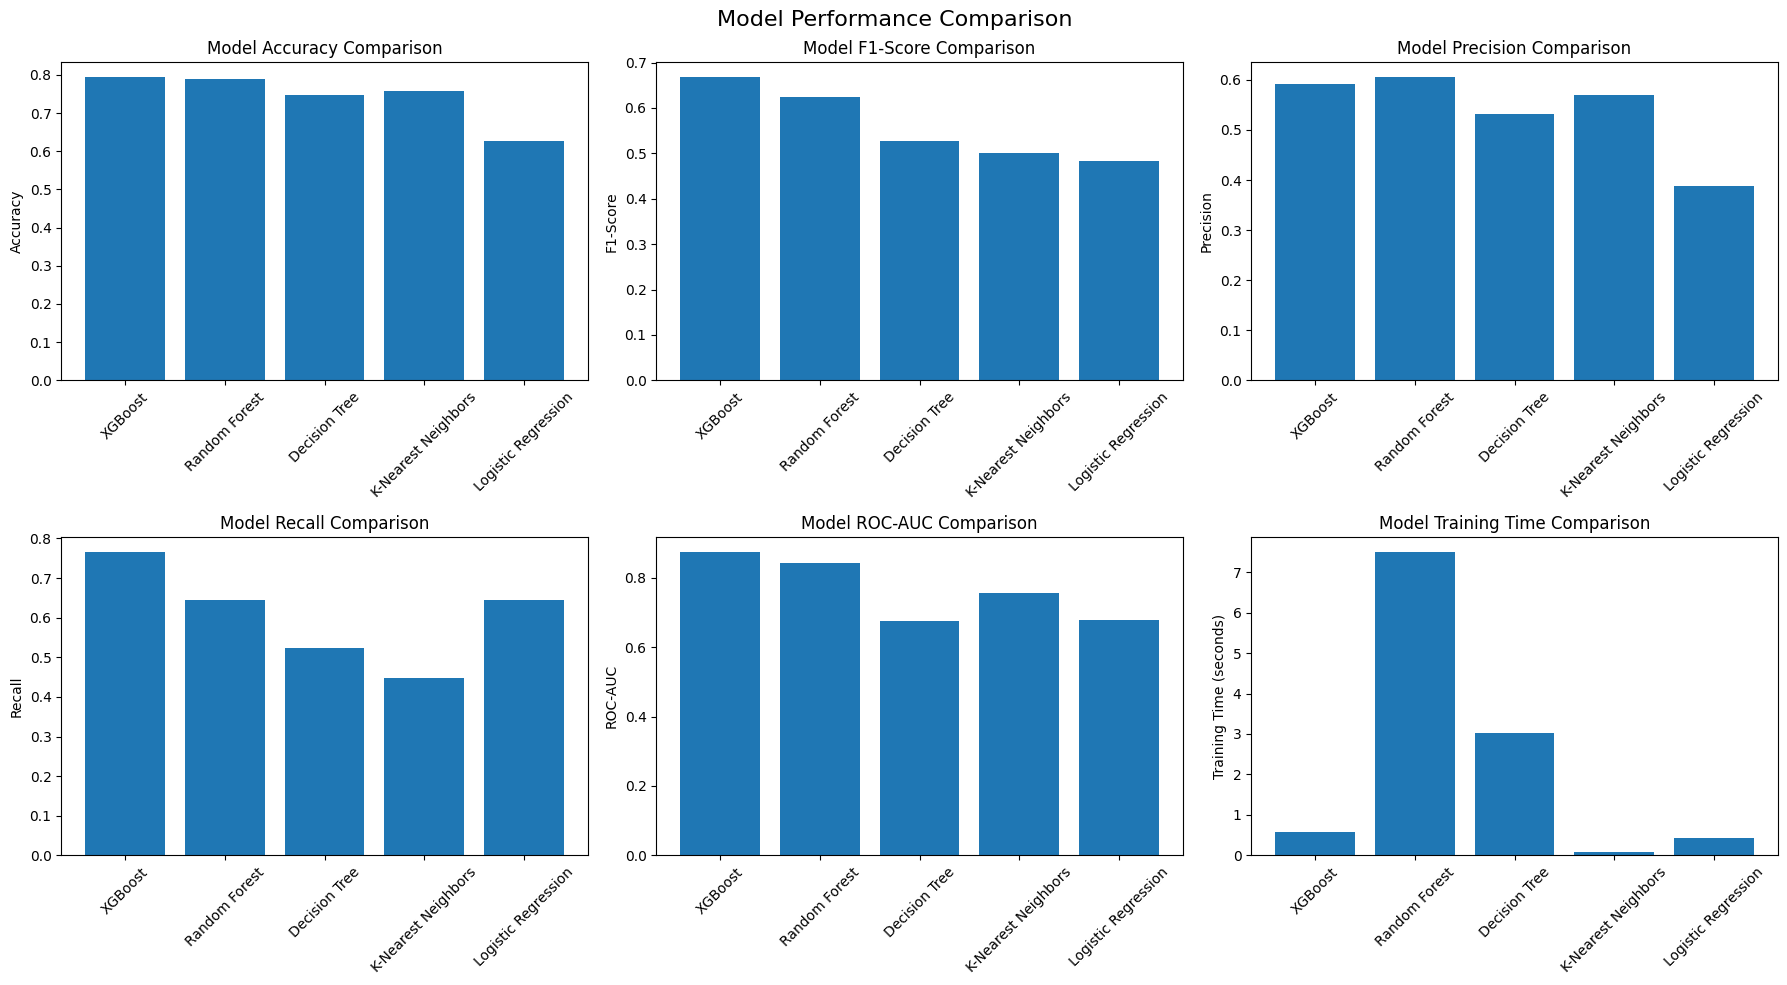

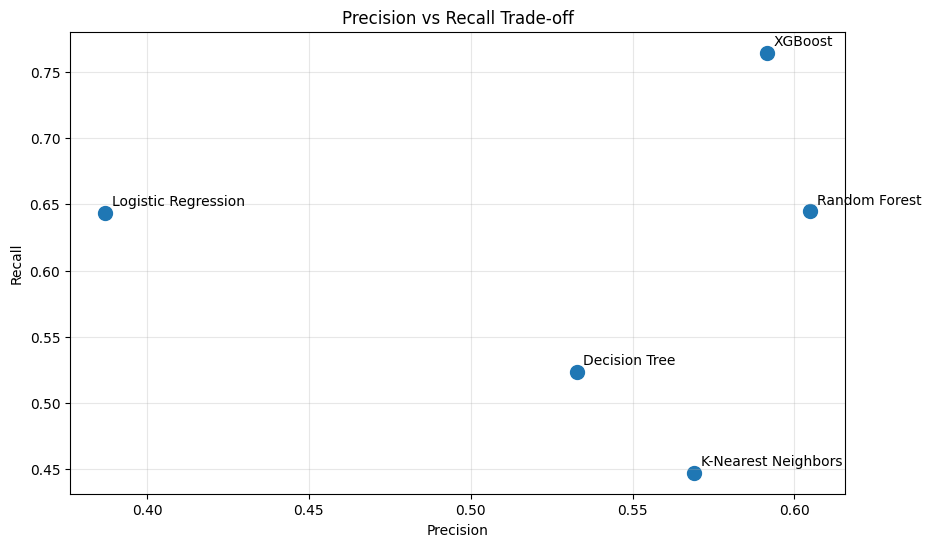

In [45]:
# Model Comparison Visualization
comparison_df = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [results['accuracy'] for results in evaluation_results.values()],
    'F1-Score': [results['f1_score'] for results in evaluation_results.values()],
    'Precision': [results['precision'] for results in evaluation_results.values()],
    'Recall': [results['recall'] for results in evaluation_results.values()],
    'ROC-AUC': [results['roc_auc'] for results in evaluation_results.values()],
    'Training Time (s)': [training_times[model] for model in evaluation_results.keys()]
})

comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

# Plot comparison with 5 metrics + training time
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Accuracy comparison
axes[0,0].bar(comparison_df['Model'], comparison_df['Accuracy'])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1 comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['F1-Score'])
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision comparison
axes[0,2].bar(comparison_df['Model'], comparison_df['Precision'])
axes[0,2].set_title('Model Precision Comparison')
axes[0,2].set_ylabel('Precision')
axes[0,2].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1,0].bar(comparison_df['Model'], comparison_df['Recall'])
axes[1,0].set_title('Model Recall Comparison')
axes[1,0].set_ylabel('Recall')
axes[1,0].tick_params(axis='x', rotation=45)

# ROC AUC comparison
axes[1,1].bar(comparison_df['Model'], comparison_df['ROC-AUC'])
axes[1,1].set_title('Model ROC-AUC Comparison')
axes[1,1].set_ylabel('ROC-AUC')
axes[1,1].tick_params(axis='x', rotation=45)

# Training Time comparison
axes[1,2].bar(comparison_df['Model'], comparison_df['Training Time (s)'])
axes[1,2].set_title('Model Training Time Comparison')
axes[1,2].set_ylabel('Training Time (seconds)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout()
plt.show()

# Additional: Precision vs Recall scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Precision'], comparison_df['Recall'], s=100)
for i, model in enumerate(comparison_df['Model']):
    plt.annotate(model, (comparison_df['Precision'].iloc[i], comparison_df['Recall'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall Trade-off')
plt.grid(True, alpha=0.3)
plt.show()

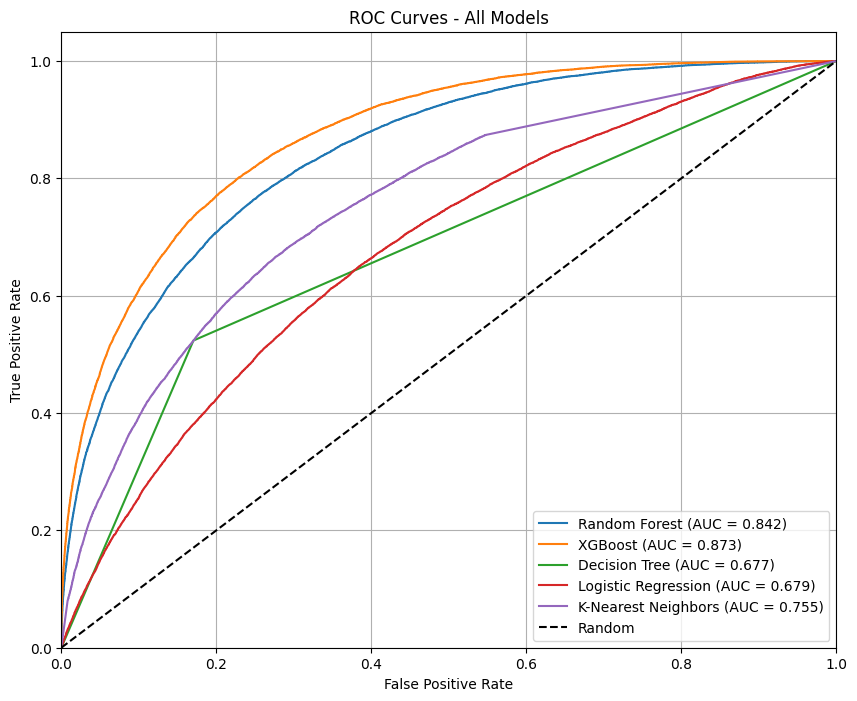

In [46]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))

for name, results in evaluation_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)
plt.show()

# Detailed Evalutaion for the best model

Best Model Summary:
Model: XGBoost
Accuracy: 0.793
F1-Score: 0.667
Precision: 0.592
Recall: 0.765
ROC-AUC: 0.873
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

No High Delay       0.90      0.80      0.85     59745
   High Delay       0.59      0.76      0.67     22178

     accuracy                           0.79     81923
    macro avg       0.75      0.78      0.76     81923
 weighted avg       0.82      0.79      0.80     81923



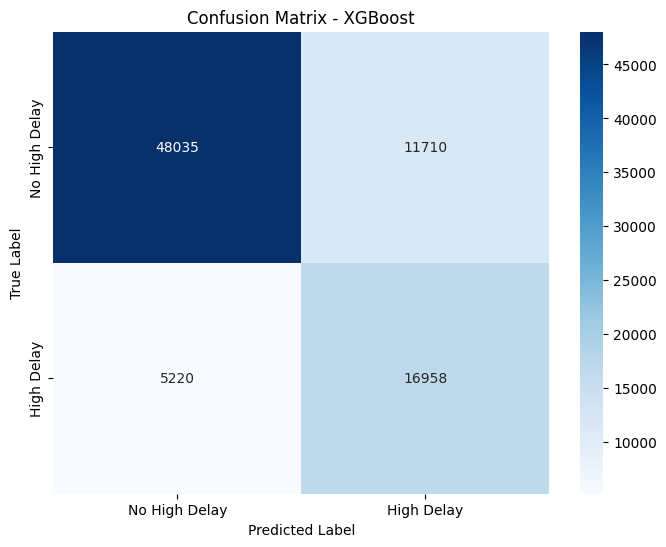

Best model (XGBoost) saved to models/best_model.pkl


In [47]:
import joblib
import os

os.makedirs('models', exist_ok=True)

best_model = optimized_models[best_model_name]
y_pred_best = evaluation_results[best_model_name]['y_pred']

print("Best Model Summary:")
print(f"Model: {best_model_name}")
best_results = evaluation_results[best_model_name]
print(f"Accuracy: {best_results['accuracy']:.3f}")
print(f"F1-Score: {best_results['f1_score']:.3f}")
print(f"Precision: {best_results['precision']:.3f}")
print(f"Recall: {best_results['recall']:.3f}")
print(f"ROC-AUC: {best_results['roc_auc']:.3f}")
print("-" * 50)

print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No High Delay', 'High Delay']))

# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No High Delay', 'High Delay'],
            yticklabels=['No High Delay', 'High Delay'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('models/confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

joblib.dump(best_model, 'models/best_model.pkl')
print(f"Best model ({best_model_name}) saved to models/best_model.pkl")

In [48]:
pipeline_data = {
    'label_encoders': label_encoders,
    'scaler': scaler,
    'feature_columns': clean_features,
    'categorical_columns': ['carrier', 'airport'],
    'airport_stats': airport_stats,
    'carrier_stats': carrier_stats,
    'class_weight_dict': class_weight_dict,
    'model_name': best_model_name,
    'model_performance': {
        'accuracy': evaluation_results[best_model_name]['accuracy'],
        'f1_score': evaluation_results[best_model_name]['f1_score'],
        'precision': evaluation_results[best_model_name]['precision'],
        'recall': evaluation_results[best_model_name]['recall'],
        'roc_auc': evaluation_results[best_model_name]['roc_auc']
    }
}

joblib.dump(pipeline_data, 'models/pipeline_data.pkl')
print("Complete pipeline data saved to models/pipeline_data.pkl")

Complete pipeline data saved to models/pipeline_data.pkl
